In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


In [2]:
exe_df = pd.read_csv('exercise_data.csv')
exe_df.head()

,User_ID,Exercise_Type,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Total_Calories_Burned
0,10796536,"Climbing hills, carrying 21 to 42 lb",male,65,179.0,89.0,7.0,88.0,39.4,17.109919
1,19207815,"Climbing hills, carrying up to 9 lbs",female,33,159.0,59.0,26.0,113.0,40.7,36.850243
2,11260824,"Track and field (high jump, pole vault)",female,23,161.0,56.0,7.0,85.0,39.7,8.067709
3,12388580,Curling,female,27,175.0,69.0,25.0,105.0,40.8,23.668024
4,14580760,Rugby,female,41,173.0,65.0,13.0,100.0,40.2,29.003823


In [3]:
exe_df.shape

(3720, 10)

In [4]:
exe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                3720 non-null   int64  
 1   Exercise_Type          3720 non-null   object 
 2   Gender                 3720 non-null   object 
 3   Age                    3720 non-null   int64  
 4   Height                 3720 non-null   float64
 5   Weight                 3720 non-null   float64
 6   Duration               3720 non-null   float64
 7   Heart_Rate             3720 non-null   float64
 8   Body_Temp              3720 non-null   float64
 9   Total_Calories_Burned  3720 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 290.8+ KB


In [5]:
exe_df.isnull().sum()

User_ID                  0
Exercise_Type            0
Gender                   0
Age                      0
Height                   0
Weight                   0
Duration                 0
Heart_Rate               0
Body_Temp                0
Total_Calories_Burned    0
dtype: int64

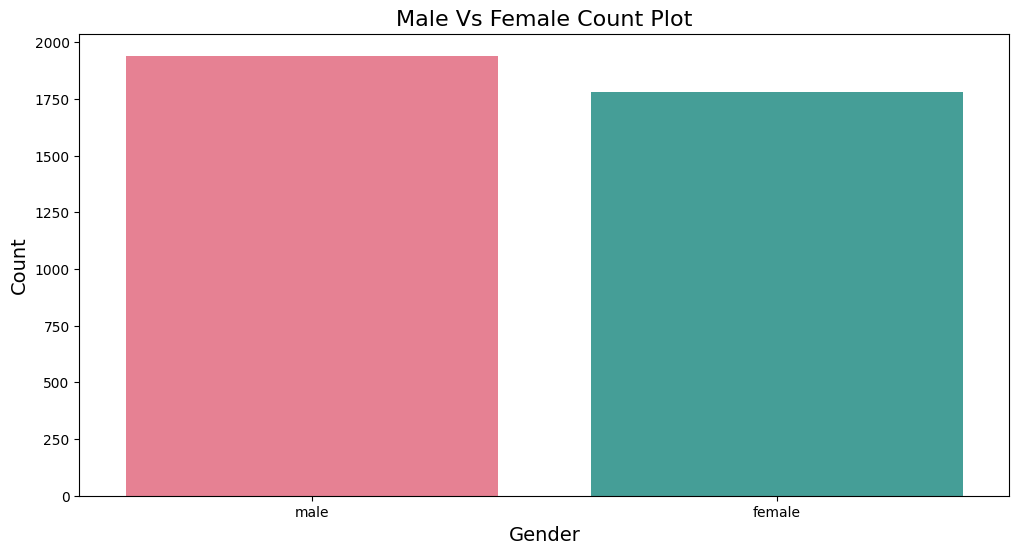

In [12]:
# Count Plot For Gender
palette = sns.color_palette("husl", 2)

plt.figure(figsize=(12,6))
sns.countplot(x='Gender', 
              data=exe_df, 
              hue="Gender", 
              palette=palette)
plt.title("Male Vs Female Count Plot", size = 16)
plt.xlabel("Gender", size = 14)
plt.ylabel("Count", size = 14)
plt.show()

In [18]:
# Selecting columns of numeric data types
numeric_columns = exe_df.select_dtypes(include='number').columns
skewness_values = {column: exe_df[column].skew() for column in numeric_columns}

# Calculate and display skewness for each numeric columns
for column, skewness in skewness_values.items():
    print(f"Skewness of {column} column : \t{skewness}")

Skewness of User_ID column : 	-0.03822257161581975
Skewness of Age column : 	0.4794625549539484
Skewness of Height column : 	-0.008732374221275612
Skewness of Weight column : 	0.19206131332955548
Skewness of Duration column : 	-0.0012556050655652745
Skewness of Heart_Rate column : 	-0.06305380353693985
Skewness of Body_Temp column : 	-1.0527046419051906
Skewness of Total_Calories_Burned column : 	1.415872405511427


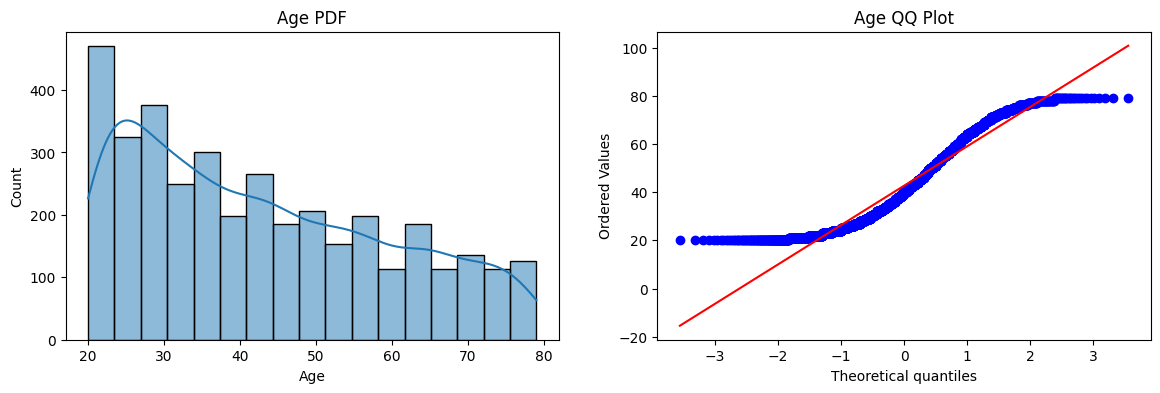

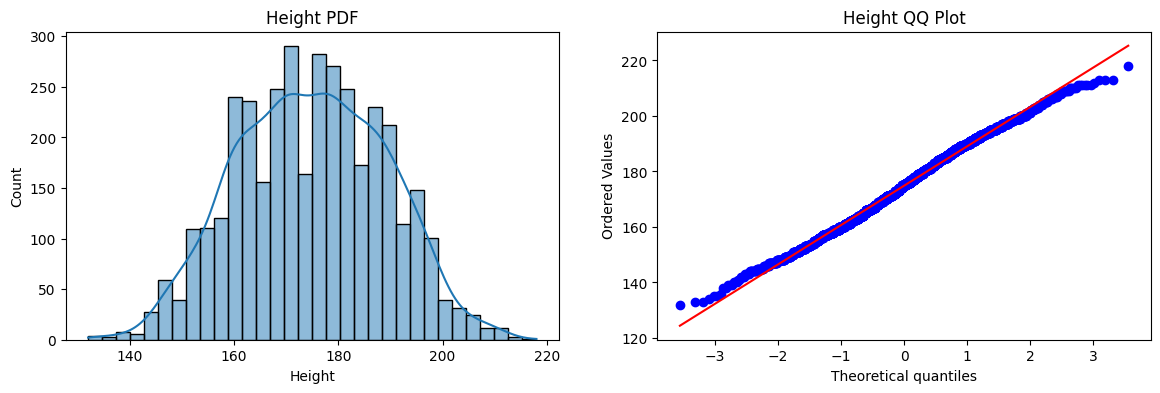

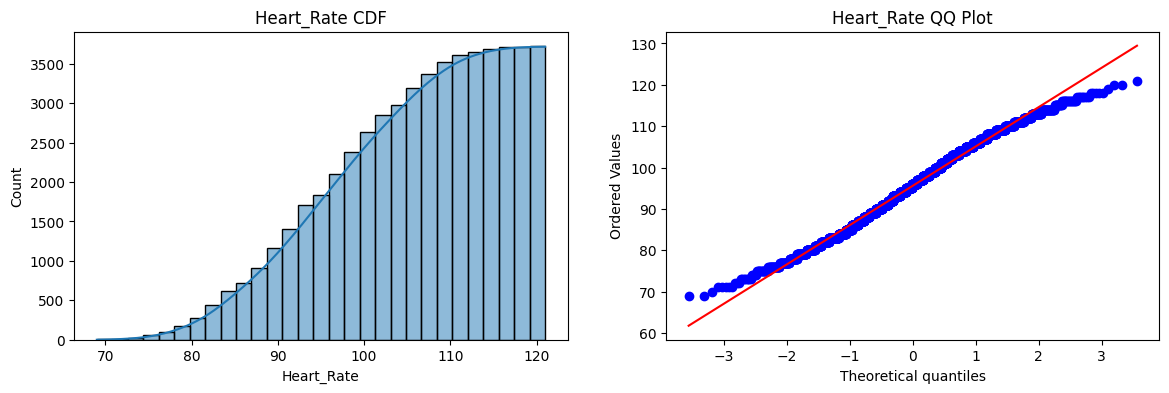

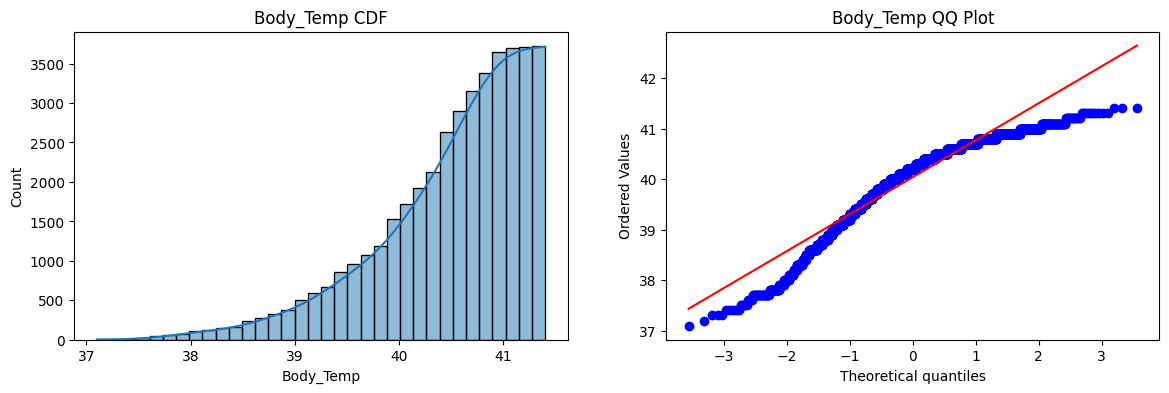

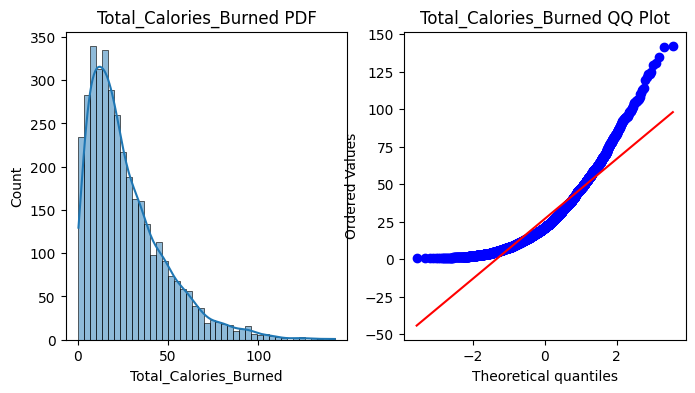

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_distribution(data, column_name, plot_type='pdf', figsize=(14, 4)):
    #generate two subplots
    plt.figure(figsize=figsize)

    # which plot type to generate
    if plot_type == 'pdf':
        # PDF subplot
        plt.subplot(121)
        sns.histplot(data=data, x=column_name, kde=True)
        plt.title(f'{column_name} PDF')
    elif plot_type == 'cdf':
        # CDF subplot
        plt.subplot(121)
        sns.histplot(data=data, x=column_name, kde=True, cumulative=True)
        plt.title(f'{column_name} CDF')

    # QQ Plot subplot
    plt.subplot(122)
    stats.probplot(data[column_name], dist="norm", plot=plt)
    plt.title(f'{column_name} QQ Plot')
    
    # Display all the plots
    plt.show()
    
# For Age and Height (PDF)
plot_distribution(exe_df,'Age', plot_type='pdf')
plot_distribution(exe_df,'Height',plot_type='pdf')

# For Heart_Rate and Body_Temp (CDF)
plot_distribution(exe_df,'Heart_Rate', plot_type='cdf')
plot_distribution(exe_df, 'Body_Temp', plot_type='cdf')

# For Total_Calories_Burned (PDF) with custom figure size
plot_distribution(exe_df, 'Total_Calories_Burned', plot_type='pdf', figsize=(8, 4))


In [24]:
#Deleting categorical column
df = pd.read_csv('exercise_data.csv')
df.drop('Exercise_Type', axis=1, inplace=True)

In [25]:
df.replace({"Gender":{'male':0,'female':1}}, inplace=True)
df.head()

/var/folders/tw/sghw4g895mn7xllnlkt87nq00000gn/T/ipykernel_41618/1471949394.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Gender":{'male':0,'female':1}}, inplace=True)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Total_Calories_Burned
0,10796536,0,65,179.0,89.0,7.0,88.0,39.4,17.109919
1,19207815,1,33,159.0,59.0,26.0,113.0,40.7,36.850243
2,11260824,1,23,161.0,56.0,7.0,85.0,39.7,8.067709
3,12388580,1,27,175.0,69.0,25.0,105.0,40.8,23.668024
4,14580760,1,41,173.0,65.0,13.0,100.0,40.2,29.003823


In [30]:
def remove_outliers(df, threshold=1.5):

    # Create a copy of the input DataFrame to avoid modifying the original
    df_cleaned = df.copy()

  
    for colums in df.columns:
        # Calculate IQR for the column
        Quart1 = df[colums].quantile(0.25)
        Quart3 = df[colums].quantile(0.75)
        IQR = Quart3 - Quart1

        # Define the upper and lower bounds for outliers
        lower_bound = Quart1 - threshold * IQR
        upper_bound = Quart3 + threshold * IQR

        # Removing outliers
        df_cleaned = df_cleaned[(df_cleaned[colums] >= lower_bound) & (df_cleaned[colums] <= upper_bound)]

    return df_cleaned

# Uses
data = remove_outliers(df, threshold=1.5)
data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Total_Calories_Burned
0,10796536,0,65,179.0,89.0,7.0,88.0,39.4,17.109919
1,19207815,1,33,159.0,59.0,26.0,113.0,40.7,36.850243
2,11260824,1,23,161.0,56.0,7.0,85.0,39.7,8.067709
3,12388580,1,27,175.0,69.0,25.0,105.0,40.8,23.668024
4,14580760,1,41,173.0,65.0,13.0,100.0,40.2,29.003823
...,...,...,...,...,...,...,...,...,...
3715,17731023,0,77,187.0,89.0,15.0,89.0,40.0,13.737745
3716,15090337,1,24,180.0,75.0,20.0,105.0,40.3,41.195632
3717,17454866,1,35,167.0,69.0,11.0,96.0,39.8,11.732800
3718,19122789,1,28,158.0,55.0,9.0,90.0,40.1,6.791694


In [32]:
#Seperating data into target values

X = data.drop(columns=['User_ID','Total_Calories_Burned'], axis=1)
Y = data[['Total_Calories_Burned']]

In [34]:
#split the data to test, and later train the model

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
len(X_train), len(Y_train), len(X_test), len(Y_test)

(2795, 2795, 699, 699)

In [35]:
#Feature Scaling to bring uniformity

scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
model1 = XGBRegressor()

# parameter grid for RandomizedSearchCV.
# there are other parameters that I could not find the accurate value
param_dist = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2],
}

random_search = RandomizedSearchCV(
    model1,
    param_distributions=param_dist,
    n_iter=5,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, Y_train)
print("Best Hyperparameters for the model are:", random_search.best_params_)
best_model = random_search.best_estimator_


# Train the best model on the sacled training set
best_model.fit(X_train_scaled, Y_train)

Best Hyperparameters for the model are: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.2, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
#making predictions on the test data set
Y_test['Pred'] = best_model.predict(X_test_scaled)

In [52]:
Y_test

,Total_Calories_Burned,Pred
1084,13.254094,30.643892
2952,41.558404,44.342308
352,34.598644,23.396427
18,6.182391,17.417065
1812,48.775628,34.227695
...,...,...
2953,55.598870,29.199350
3382,43.219871,32.685944
226,10.377643,7.679068
916,25.925784,21.026033


In [54]:
# Getting the best model from the random search
best_model_pred = random_search.best_estimator_

# Training the best model on the entire training set
best_model_pred.fit(X_train_scaled, Y_train)

# R Square Value for the model
r_square_val = best_model_pred.score(X_train_scaled, Y_train)
print("R^2 Value is = ",r_square_val)

R^2 Value is =  0.7007538422117647


In [56]:
#RMSE value from test data
Y_test["Sqerror"] = (Y_test["Total_Calories_Burned"] - Y_test["Pred"]) ** 2

# Mean Square Error 
Error_mean = Y_test["Sqerror"].mean()

import math

# RootMeanSquareError of the model 
RMSE = math.sqrt(Error_mean)
print("RMSE Value is = ",RMSE)

RMSE Value is =  13.530716866075759


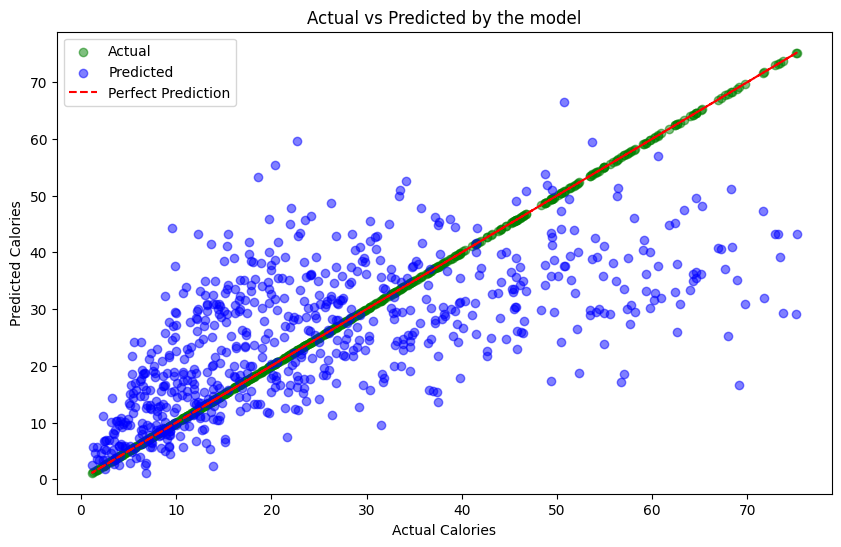

In [59]:
# Plotting Actual vs Predicted with different colors
plt.figure(figsize=(10, 6))

# Plotting actual vs predicted values
plt.scatter(df['Total_Calories_Burned'], df['Total_Calories_Burned'], color='green', label='Actual', alpha=0.5)
plt.scatter(df['Total_Calories_Burned'], df['Pred'], color='blue', label='Predicted', alpha=0.5)


# Adding title and labels
plt.title('Actual vs Predicted by the model')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')

# the line for perfect prediction
plt.plot(df['Total_Calories_Burned'], df['Total_Calories_Burned'], color='red', linestyle='--', label='Perfect Prediction')

plt.legend()
plt.show()
